In [28]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import os
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import joblib

In [29]:
data = pd.read_csv(r"D:\loan_approval_dataset.csv")

In [30]:
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [32]:
data.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [33]:
# delete the spaces in column names
data.columns = data.columns.str.strip()
data.columns

Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [34]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
loan_id,4269.000000,2135.000000,1232.498479,1.000000,1068.000000,2135.000000,3202.000000,4269.000000
no_of_dependents,4269.000000,2.498712,1.695910,0.000000,1.000000,3.000000,4.000000,5.000000
income_annum,4269.000000,5059123.916608,2806839.831818,200000.000000,2700000.000000,5100000.000000,7500000.000000,9900000.000000
loan_amount,4269.000000,15133450.456781,9043362.984843,300000.000000,7700000.000000,14500000.000000,21500000.000000,39500000.000000
loan_term,4269.000000,10.900445,5.709187,2.000000,6.000000,10.000000,16.000000,20.000000
cibil_score,4269.000000,599.936051,172.430401,300.000000,453.000000,600.000000,748.000000,900.000000
residential_assets_value,4269.000000,7472616.537831,6503636.587664,-100000.000000,2200000.000000,5600000.000000,11300000.000000,29100000.000000
commercial_assets_value,4269.000000,4973155.305692,4388966.089638,0.000000,1300000.000000,3700000.000000,7600000.000000,19400000.000000
luxury_assets_value,4269.000000,15126305.926446,9103753.665256,300000.000000,7500000.000000,14600000.000000,21700000.000000,39200000.000000
bank_asset_value,4269.000000,4976692.433825,3250185.305696,0.000000,2300000.000000,4600000.000000,7100000.000000,14700000.000000


In [35]:
scaler = MinMaxScaler()
for i in data.columns[data.dtypes=='int64']:
    data[i] = scaler.fit_transform(data[[i]])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,Graduate,No,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,Approved
1,0.000234,0.0,Not Graduate,Yes,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,Rejected
2,0.000469,0.6,Graduate,No,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,Rejected
3,0.000703,0.6,Graduate,No,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,Rejected
4,0.000937,1.0,Not Graduate,Yes,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,Rejected


In [36]:
label_encoder = LabelEncoder()
for i in data.columns[data.dtypes=='object']:
    data[i] = label_encoder.fit_transform(data[i])
data.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,0.000000,0.4,0,0,0.969072,0.755102,0.555556,0.796667,0.085616,0.907216,0.575835,0.544218,0
1,0.000234,0.0,1,1,0.402062,0.303571,0.333333,0.195000,0.095890,0.113402,0.218509,0.224490,1
2,0.000469,0.6,0,0,0.917526,0.750000,1.000000,0.343333,0.246575,0.231959,0.848329,0.870748,1
3,0.000703,0.6,0,0,0.824742,0.775510,0.333333,0.278333,0.626712,0.170103,0.591260,0.537415,1
4,0.000937,1.0,1,1,0.989691,0.609694,1.000000,0.136667,0.428082,0.422680,0.748072,0.340136,1


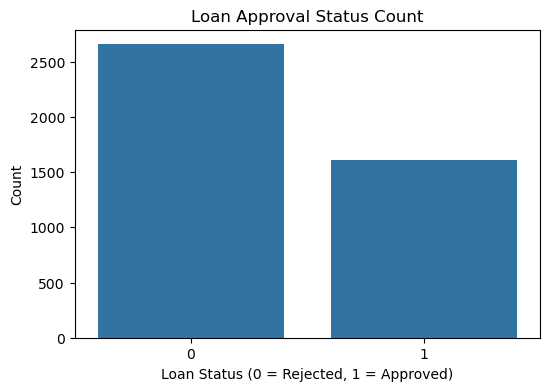

In [37]:
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=data)
plt.xlabel("Loan Status (0 = Rejected, 1 = Approved)")
plt.ylabel("Count")
plt.title("Loan Approval Status Count")
plt.show()

In [38]:
corr_matrix = data.corr()
corr_matrix

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
loan_id,1.000000,0.005326,-0.015536,0.001745,0.012592,0.008170,0.009809,0.016323,0.020936,0.018595,-0.000862,0.010765,-0.017685
no_of_dependents,0.005326,1.000000,-0.002697,0.000765,0.007266,-0.003366,-0.020111,-0.009998,0.007376,-0.001531,0.002817,0.011163,0.018114
education,-0.015536,-0.002697,1.000000,0.023224,-0.011625,-0.010631,0.008417,0.004649,-0.010930,0.006763,-0.012471,-0.009424,0.004918
self_employed,0.001745,0.000765,0.023224,1.000000,0.002368,0.001450,0.004107,-0.004866,0.006144,-0.017998,0.004413,-0.000215,-0.000345
income_annum,0.012592,0.007266,-0.011625,0.002368,1.000000,0.927470,0.011488,-0.023034,0.636841,0.640328,0.929145,0.851093,0.015189
loan_amount,0.008170,-0.003366,-0.010631,0.001450,0.927470,1.000000,0.008437,-0.017035,0.594596,0.603188,0.860914,0.788122,-0.016150
loan_term,0.009809,-0.020111,0.008417,0.004107,0.011488,0.008437,1.000000,0.007810,0.008016,-0.005478,0.012490,0.017177,0.113036
cibil_score,0.016323,-0.009998,0.004649,-0.004866,-0.023034,-0.017035,0.007810,1.000000,-0.019947,-0.003769,-0.028618,-0.015478,-0.770518
residential_assets_value,0.020936,0.007376,-0.010930,0.006144,0.636841,0.594596,0.008016,-0.019947,1.000000,0.414786,0.590932,0.527418,0.014367
commercial_assets_value,0.018595,-0.001531,0.006763,-0.017998,0.640328,0.603188,-0.005478,-0.003769,0.414786,1.000000,0.591128,0.548576,-0.008246


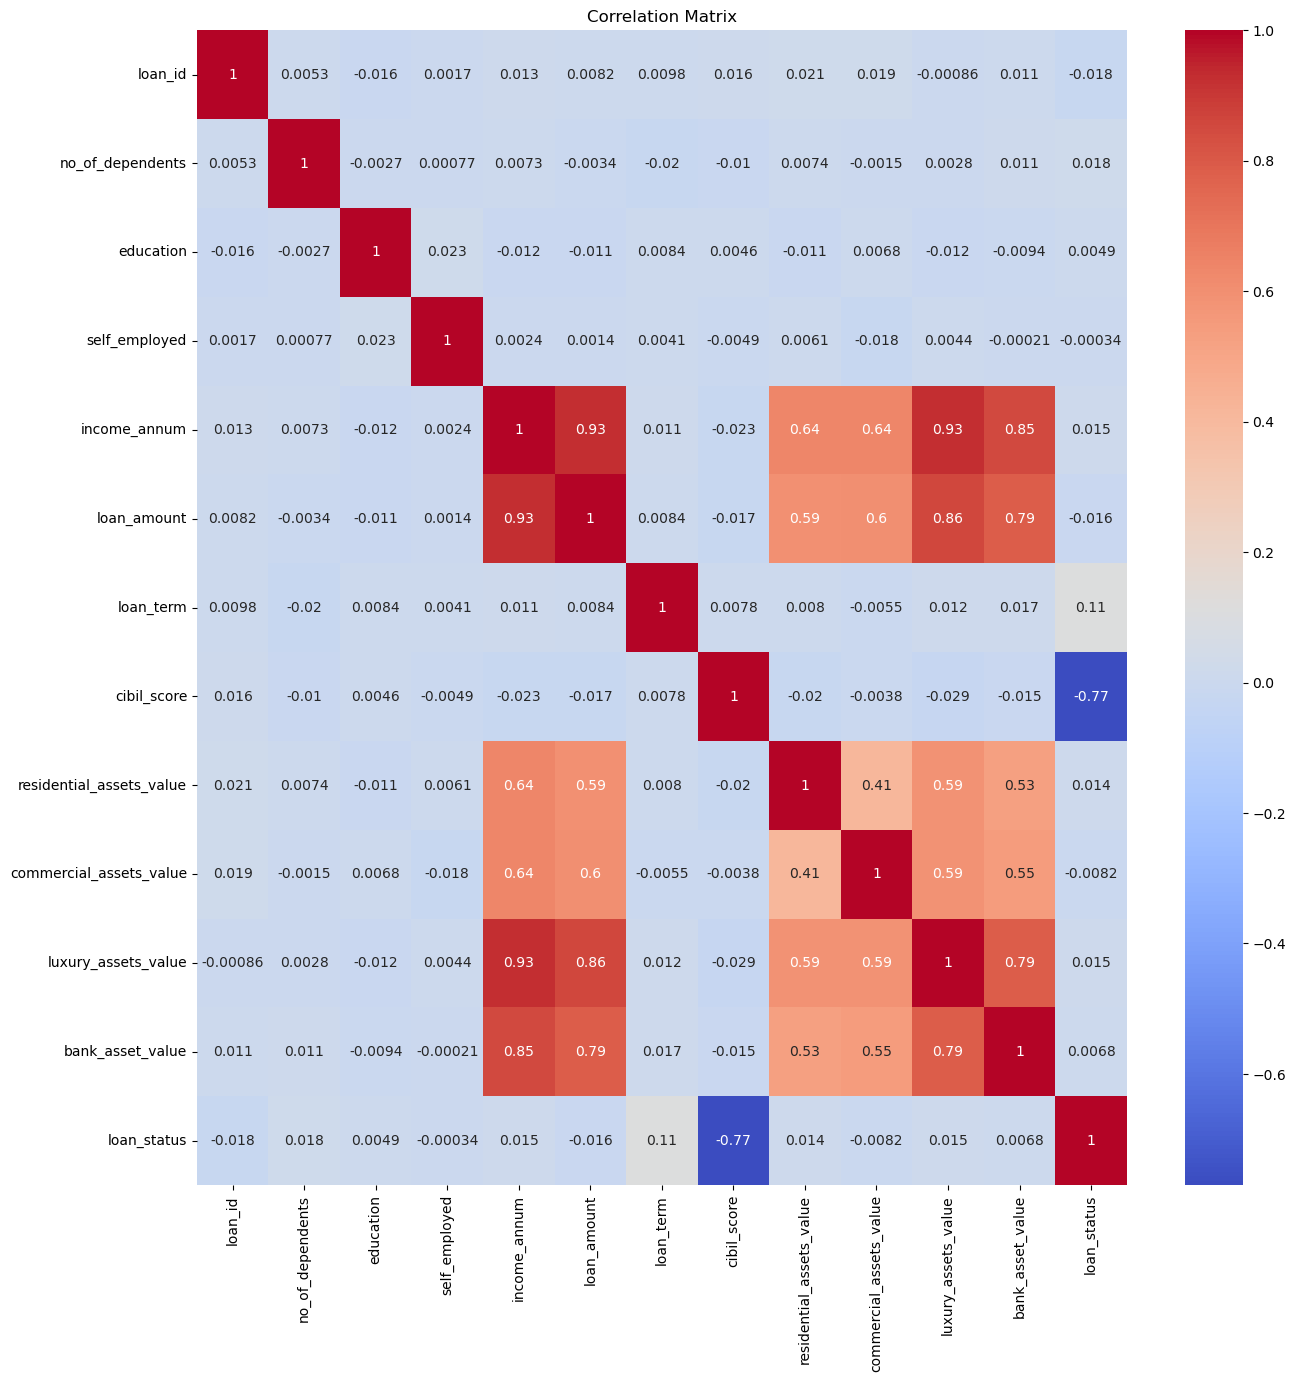

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm',annot=True)
plt.title('Correlation Matrix')
plt.show()

In [40]:
data.corr()['loan_status'].sort_values()

cibil_score                -0.770518
loan_id                    -0.017685
loan_amount                -0.016150
commercial_assets_value    -0.008246
self_employed              -0.000345
education                   0.004918
bank_asset_value            0.006778
residential_assets_value    0.014367
income_annum                0.015189
luxury_assets_value         0.015465
no_of_dependents            0.018114
loan_term                   0.113036
loan_status                 1.000000
Name: loan_status, dtype: float64

In [41]:
# drop columns with low correlation to the target
data_no_cibil = data.copy()
data.drop(['commercial_assets_value', 'self_employed', 'loan_id', 'education', 'bank_asset_value', 'residential_assets_value'], axis='columns', inplace=True)
data.head()


,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,luxury_assets_value,loan_status
0,0.4,0.969072,0.755102,0.555556,0.796667,0.575835,0
1,0.0,0.402062,0.303571,0.333333,0.195000,0.218509,1
2,0.6,0.917526,0.750000,1.000000,0.343333,0.848329,1
3,0.6,0.824742,0.775510,0.333333,0.278333,0.591260,1
4,1.0,0.989691,0.609694,1.000000,0.136667,0.748072,1


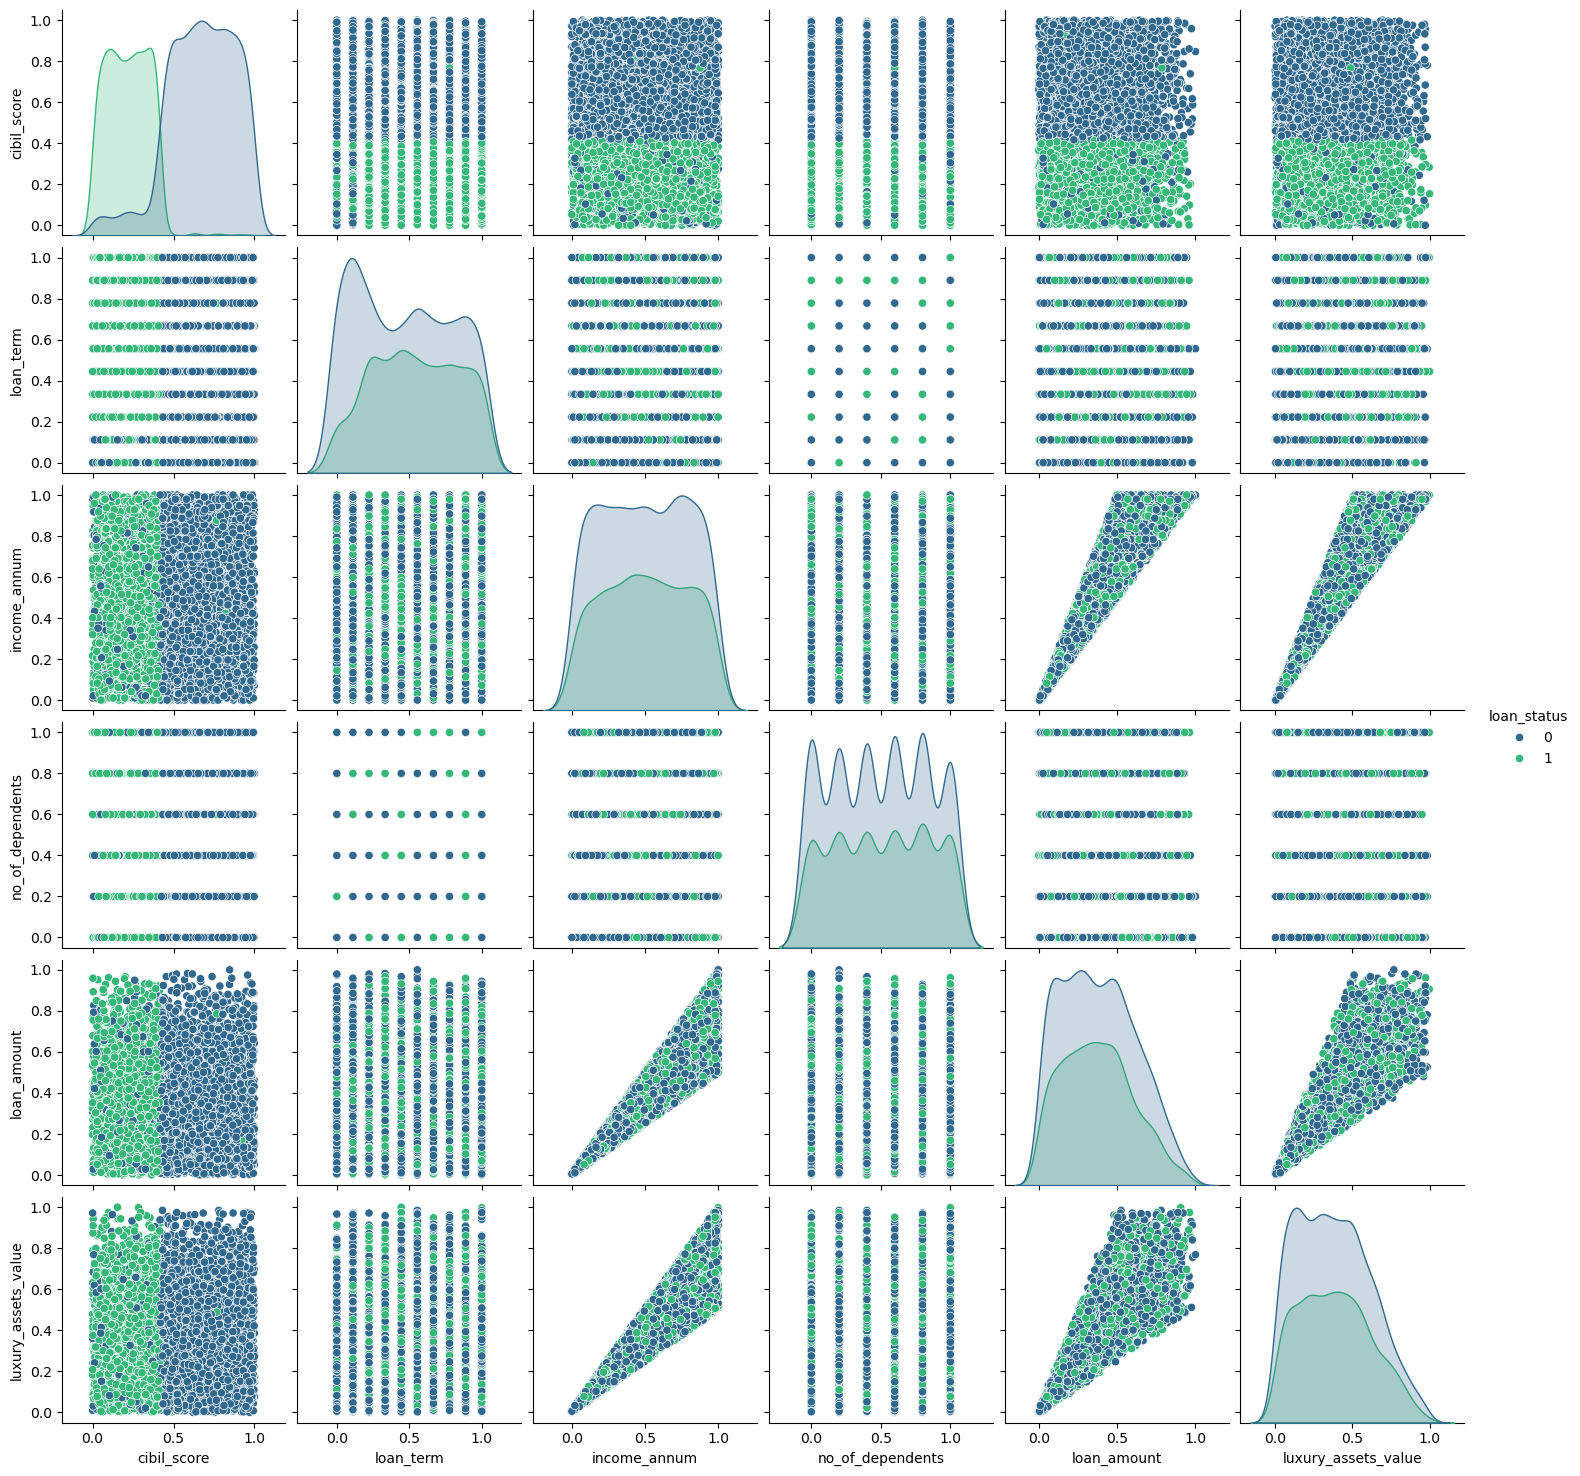

In [42]:
key_features = ['loan_status', 'cibil_score', 'loan_term', 'income_annum', 'no_of_dependents', 'loan_amount', 'luxury_assets_value']
sns.pairplot(data[key_features], hue='loan_status', palette='viridis')
plt.show()

C:\Users\ashwi\AppData\Local\Temp\ipykernel_12276\540986275.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=feature_names, palette='viridis', hue=None, legend=False)


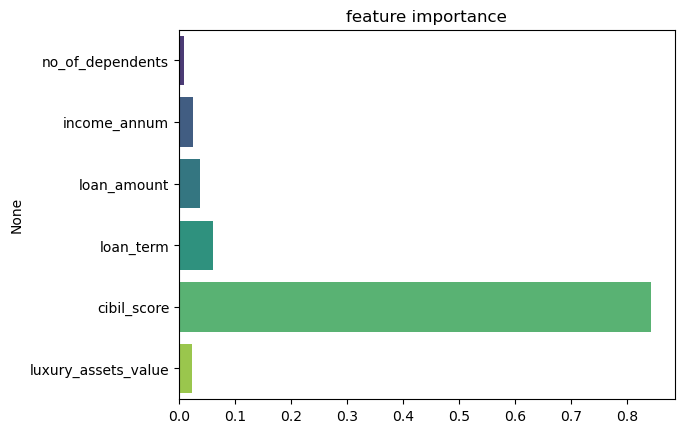

In [43]:
# feature importance based on the random forest
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns='loan_status')
y = data['loan_status']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

importance = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importance, y=feature_names, palette='viridis', hue=None, legend=False)
plt.title('feature importance')
plt.show()

In [44]:
x = data.drop(["loan_status"],axis=1)
y = data["loan_status"]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [45]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
regpred = reg.predict(x_test)

from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,regpred))
print("Accuracy of Logistic Regression is : ",accuracy_score(y_test,regpred)*100)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       555
           1       0.89      0.88      0.88       299

    accuracy                           0.92       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.92      0.92      0.92       854

Accuracy of Logistic Regression is :  91.68618266978923


In [46]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print("Mean Absolute Error : ",mean_absolute_error(y_test,regpred))
print("Mean Squared Error : ",mean_squared_error(y_test,regpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,regpred)))
print("R2 Score : ",r2_score(y_test,regpred))

Mean Absolute Error :  0.08313817330210772
Mean Squared Error :  0.08313817330210772
Root Mean Squared Error :  0.28833690936490897
R2 Score :  0.634613878092139


In [47]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(x_train,y_train)
dtreepred = dtree.predict(x_test)

print(classification_report(y_test,dtreepred))
print("Accuracy of Decision Tree is : ",accuracy_score(y_test,dtreepred)*100)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       555
           1       0.96      0.98      0.97       299

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Decision Tree is :  97.89227166276346


In [48]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,dtreepred))
print("Mean Squared Error : ",mean_squared_error(y_test,dtreepred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,dtreepred)))
print("R2 Score : ",r2_score(y_test,dtreepred))

Mean Absolute Error :  0.02107728337236534
Mean Squared Error :  0.02107728337236534
Root Mean Squared Error :  0.14518017554874818
R2 Score :  0.9073668986712465


In [49]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rfpred = rf.predict(x_test)

print(classification_report(y_test,rfpred))
print("Accuracy of Random Forest is is : ",accuracy_score(y_test,rfpred)*100)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       555
           1       0.97      0.98      0.97       299

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Accuracy of Random Forest is is :  98.24355971896955


In [50]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,rfpred))
print("Mean Squared Error : ",mean_squared_error(y_test,rfpred))
print("Root Mean Squared Error : ",np.sqrt(mean_squared_error(y_test,rfpred)))
print("R2 Score : ",r2_score(y_test,rfpred))

Mean Absolute Error :  0.01756440281030445
Mean Squared Error :  0.01756440281030445
Root Mean Squared Error :  0.13253076175101555
R2 Score :  0.9228057488927054


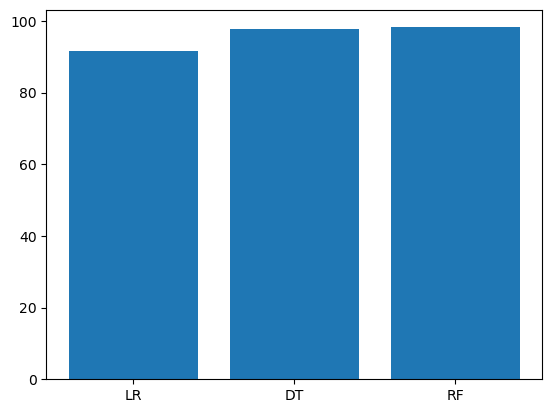

In [51]:
LR = accuracy_score(y_test,regpred)*100
DT = accuracy_score(y_test,dtreepred)*100
RF = accuracy_score(y_test,rfpred)*100

Model = ['LR','DT','RF']
Score = [LR, DT, RF]
barplot = plt.bar(x=Model,height=Score)
plt.show()

In [ ]:
dtree_model = joblib.dump(r'D:\loan_models\dtree_model.pkl')
rf_model = joblib.dump(r'D:\loan_models\rf_model.pkl')


import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Assuming models are already trained
# dtree, rf, and log_reg are the trained Decision Tree, Random Forest, and Logistic Regression models

# Taking user input for selected features
cibil_score = float(input("Enter CIBIL Score: "))
loan_term = int(input("Enter Loan Term (in months): "))
income_annum = float(input("Enter Annual Income: "))
no_of_dependents = int(input("Enter Number of Dependents: "))
loan_amount = float(input("Enter Loan Amount: "))
luxury_assets_value = float(input("Enter Luxury Assets Value: "))



# Creating an input array
input_data = np.array([[no_of_dependents,income_annum, loan_amount, 
                         loan_term, cibil_score, 
                         luxury_assets_value]])

# Making predictions
dtree_pred = dtree.predict(input_data)[0]
rf_pred = rf.predict(input_data)[0]
#log_reg_pred = log_reg.predict(input_data)[0]

# Displaying results
print("\nLoan Approval Predictions:")
print(f"Decision Tree Prediction: {'Approved' if dtree_pred == 1 else 'Rejected'}")
print(f"Random Forest Prediction: {'Approved' if rf_pred == 1 else 'Rejected'}")
#print(f"Logistic Regression Prediction: {'Approved' if log_reg_pred == 1 else 'Rejected'}")
